# Network EDA

basically learning how to use networkx lmao gdi

https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

### Importing the necessary modules and files

In [1]:
from glob import glob

In [2]:
all_files_paths = glob('edges_from_*.pkl')
len(all_files_paths)

11

In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
# import python-louvain
from networkx.algorithms import community as co

%matplotlib inline

/Users/jennwon/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/jennwon/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [19]:
import pandas as pd
follower = pd.read_pickle('follower_query.pkl')
following = pd.read_pickle('following_queries.pkl')

/Users/jennwon/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/jennwon/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
#follower.head(10) #read as A is following B

In [5]:
#following.head(10) #read as A is followed by B

### EDA
I want to learn how to use networkx with a smaller dataset before i try to do it with all my data

In [67]:
sum(follower['user_they_follow'] == '477797010')

7

These nodes with a very high degree in the network are called hubs. Damien, can we consider hubs influencers?

In [71]:
import random

def do_bfs(edge_list, start, sample_number, max_neighbors = 30):
    # edge_list is a dataframe with the necessary column 'user_they_follow'
    edges = []
    seen = set()
    Q = [start]
    print(Q, flush=True)
    while len(Q) > 0 and len(edges) < sample_number #this is telling the algorithm when to stop, because i've
    # established 400 connections
        current = Q.pop(0)
        seen.add(current)
        
        mask = (edge_list['user_they_follow'] == current) # this tells me that i'm only interested in this user
        n = max_neighbors
        n = min(n, sum(mask)) 
        if n == 0:
            continue
        print(f'n = {n}')
        edges_to_add = edge_list[mask].sample(n)
            
        for index, row in edges_to_add.iterrows():
            follower_of, user_they_follow, _  = row
            if follower_of not in seen:
                Q.append(follower_of)
            edges.append((follower_of, user_they_follow))
    return edges

# follower_sample = do_bfs(follower, '477797010', 400, 15)

['477797010']
n = 7
n = 15
n = 15
n = 15
n = 14
n = 12
n = 15
n = 15
n = 15
n = 15
n = 15
n = 15
n = 15
n = 15
n = 15
n = 15
n = 14
n = 4
n = 15
n = 15
n = 1
n = 15
n = 15
n = 15
n = 15
n = 15
n = 2
n = 6
n = 15
n = 15
n = 15


In [92]:
# now to write the function that keeps tracks of the degree! yay

import random
from collections import deque

def do_bfs_with_degree(edge_list, start, sample_number, max_neighbors = 30, max_degree = 3, verbose=False):
    edges = []
    seen = set()
    Q = deque([(start, 0)])
    degree_counter = 0
    num_iterations = 0
    while len(Q) > 0 and len(edges) < sample_number and degree_counter < max_degree:
        
        if verbose and (num_iterations % 20 == 0):
            print(f"Iteration {num_iterations:3d}: length of queue is {len(Q)}, num edges is {len(edges)}, num vertices visited {len(seen)}")
        
        current, degree = Q.popleft()
        seen.add(current)
        
        mask = (edge_list['user_they_follow'] == current) # this tells me that i'm only interested in this user
        n = max_neighbors
        n = min(n, sum(mask)) 
        if n == 0:
            continue
        edges_to_add = edge_list[mask].sample(n)
            
        for index, row in edges_to_add.iterrows():
            follower_of, user_they_follow, _  = row
            if follower_of not in seen:
                #print(f'\tFrom {current} (at {degree} steps): Adding {follower_of, degree + 1}')
                Q.append((follower_of, degree +1))
                
            edges.append((follower_of, user_they_follow))
            degree_counter = degree
        num_iterations += 1
    return edges

follower_sample = do_bfs_with_degree(follower, '477797010', 500, max_degree = 6, verbose = True)

Iteration   0: length of queue is 1, num edges is 0, num vertices visited 0
Iteration  20: length of queue is 359, num edges is 379, num vertices visited 21


In [93]:
len(follower_sample)

511

In [10]:
import networkx as nx
simple_graph = nx.Graph()
simple_graph.add_edges_from([('a','b'), ('b','c'), ('c','a'),('d', 'a'), ('d', 'b')])

In [14]:
simple_graph.edges('a')

EdgeDataView([('a', 'b'), ('a', 'c'), ('a', 'd')])

In [15]:
set(simple_graph['a'])

{'b', 'c', 'd'}

In [16]:
def bfs(graph, start):
    visited, queue = set(), [start]
    while queue: #while the queue is not empty
        vertex = queue.pop(0) # takes a vertex from the queue to start doing work
        if vertex not in visited:
            visited.add(vertex) #add it to the visited
            queue.extend(set(graph[vertex]) - visited) # is this finding all the new nodes that the vertex is connected to?
    return visited # this returns the nodes, but I want to return the edges to build my graph!

bfs(simple_graph, 'a') # {'B', 'C', 'A', 'F', 'D', 'E'}

{'a', 'b', 'c', 'd'}

In [4]:
import pickle
undirected_graph = nx.Graph()


for path in all_files_paths:
    print(f'loading edges from {path}')
    #break
    with open(path, 'rb') as file_name:
        edges = pickle.load(file_name)
        undirected_graph.add_edges_from(edges)
        file_name.close()
    #break

loading edges from edges_from_95137413.pkl
loading edges from edges_from_5794526.pkl
loading edges from edges_from_209934043.pkl
loading edges from edges_from_328680090.pkl
loading edges from edges_from_477797010.pkl
loading edges from edges_from_119133497.pkl
loading edges from edges_from_74835904.pkl
loading edges from edges_from_106649957.pkl
loading edges from edges_from_205249716.pkl
loading edges from edges_from_61021539.pkl
loading edges from edges_from_78655151.pkl


In [6]:
with open('all_bfs_edges.pkl', 'wb') as file_name:
    pickle.dump(edges, file_name)
    file_name.close()

In [28]:
directed_graph = nx.DiGraph()
directed_graph.add_edges_from(edges)

In [10]:
print(nx.info(undirected_graph)) # this makes sense because i limited the bfs to 5 neighbors

Name: 
Type: Graph
Number of nodes: 278500
Number of edges: 758747
Average degree:   5.4488


In [12]:
from collections import Counter
degree_dict = Counter([degree for _, degree in undirected_graph.degree()])



This is the number of nodes for the undirected graph (why are the bars different shapes)

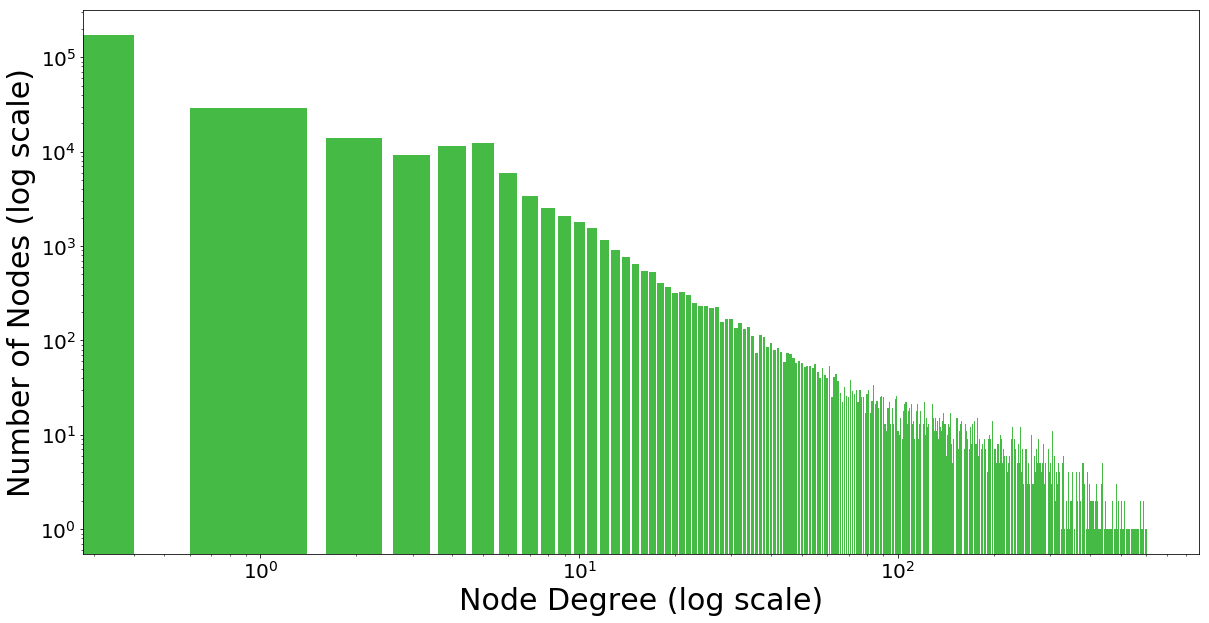

In [21]:
import seaborn as sns
degree_hist = pd.DataFrame({"degree": list(degree_dict.values()),
                            "Number of Nodes": list(degree_dict.keys())})


plt.figure(figsize=(20,10))
sns.barplot(y = 'degree', x = 'Number of Nodes', 
              data = degree_hist, 
              color = 'limegreen')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Node Degree (log scale)', fontsize=30)
plt.ylabel('Number of Nodes (log scale)', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

This tells me that most of the nodes in my network have few degrees!

#### Now it's time to do the in/out degree for the directed

In [33]:
import numpy as np


ins = [np.log(degree) for _, degree in directed_graph.in_degree()]
outs = [np.log(degree) for _, degree in directed_graph.out_degree()]

/Users/jennwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/jennwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


/Users/jennwon/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/jennwon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jennwon/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/jennwon/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/jennwon/anaconda3/lib/python3.6/sit

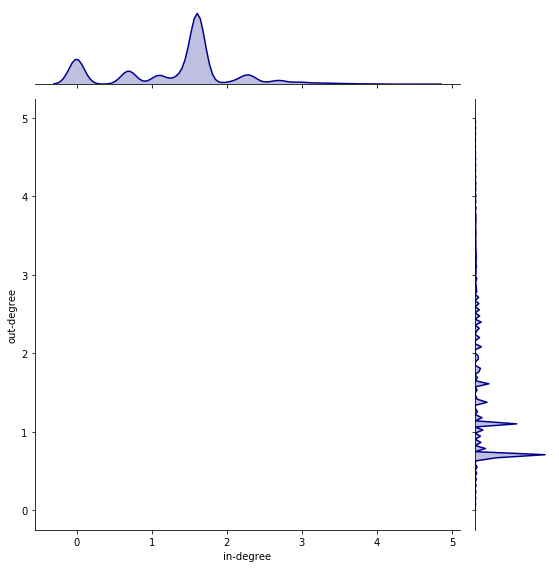

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

degrees = pd.DataFrame({"in-degree": ins, "out-degree": outs})

fig = sns.jointplot(x="in-degree",y="out-degree",data=degrees,kind="kde", color = 'darkblue',size=8)


In [22]:
nx.density(undirected_graph) #this means that it's not very dense aka communities present yay!

1.9564922998379432e-05

In [23]:
nx.diameter(undirected_graph)

KeyboardInterrupt: 

In [9]:
test_graph = nx.DiGraph()
undirected_tst = nx.Graph()

In [8]:
# follower_sample.head()

In [4]:
# ok i need to turn this into a tuple
follower_tuple_list = []
for index, row in follower_sample.iterrows():
    follower_tuple_list.append((row[0], int(row[1])))

In [5]:
# do the same for the followings

# ok i need to turn this into a tuple
following_tuple_list = []
for index, row in following_sample.iterrows():
    following_tuple_list.append((row[0], int(row[1])))

In [13]:
undirected_graph = nx.Graph()

In [14]:
test_graph.add_edges_from(follower_tuple_list)
test_graph.add_edges_from(following_tuple_list)

In [15]:
undirected_graph.add_edges_from(follower_tuple_list)
undirected_graph.add_edges_from(following_tuple_list)

In [ ]:
# hey jenn maybe you should try to make the nodes smaller so that it will be easier to read the picture

# this is so computationally expensive to run dont run it its so stupid

plt.figure(dpi = 150)
# nx.draw(undirected_graph, node_color = 'pink',with_labels=1) #hell yea i got a pink noded graph #can draw_circular for fun

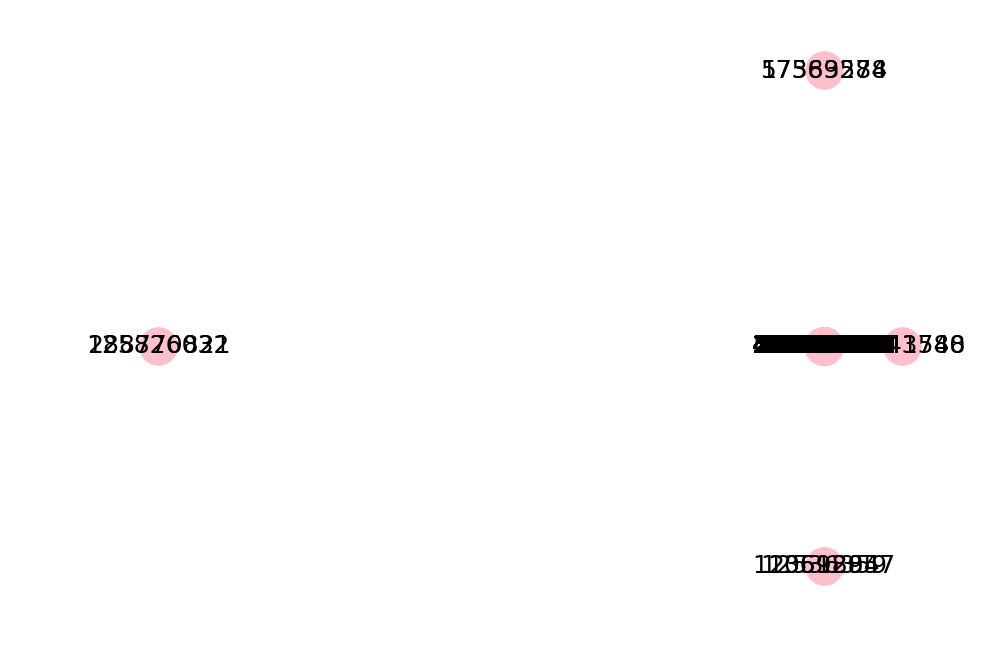

In [24]:
plt.figure(dpi = 150)
nx.draw_spectral(test_graph, node_color = 'pink',with_labels=1) #hell yea i got a pink noded graph #can draw_circular for fun

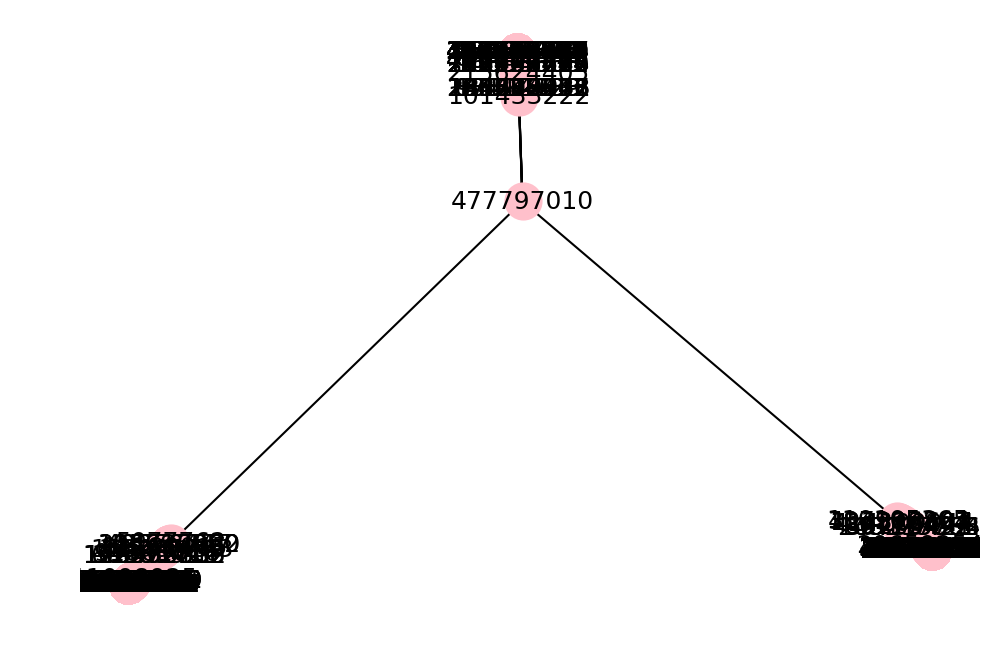

In [73]:
plt.figure(dpi=150)
nx.draw_spectral(undirected_graph, node_color = 'pink',with_labels=1)

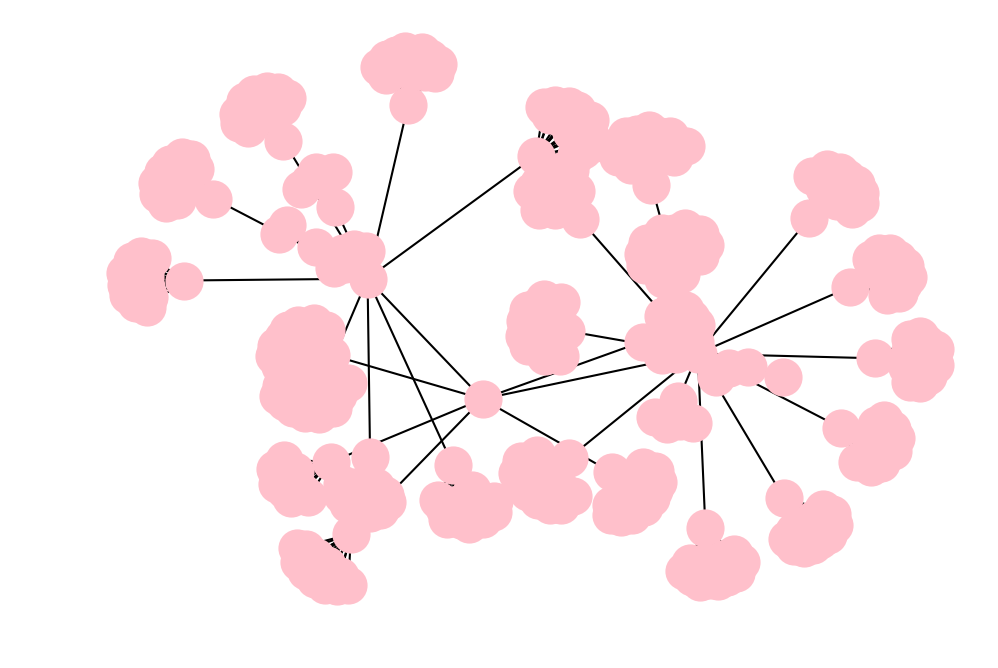

In [126]:
plt.figure(dpi = 150)
nx.draw(undirected_graph, node_color = 'pink')

### Before star wars

In [42]:
from networkx.algorithms import community as co

community_generator = co.girvan_newman(undirected_graph)

In [38]:
# SWC = list(community_generator) # what does it mean to make a generator into a list?

In [43]:
def print_level_gn(partition, graph, cutoff = 0):
    for community_number, members in enumerate(partition):
        if len(members) >= cutoff:
            print(f"Community {community_number} (size = {len(members)})")
            print('-'*20)
            print(members)
            print()

In [44]:
print_level_gn(next(community_generator), undirected_graph, 3)

KeyboardInterrupt: 

/Users/jennwon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


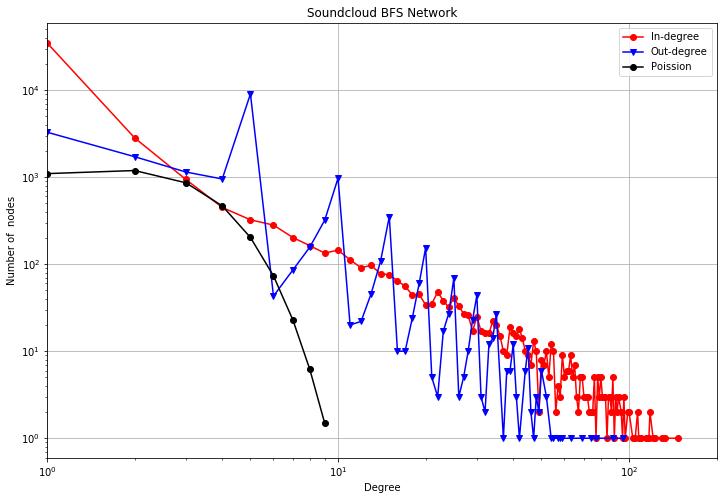

In [46]:
from collections import Counter
import collections
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

in_degrees  = directed_graph.in_degree() 
in_h = Counter([degrees for _, degrees in directed_graph.in_degree()])
in_dic = collections.OrderedDict(sorted(in_h.items()))
in_hist = list(in_dic.values())
in_values =list(in_dic.keys())

out_degrees  = directed_graph.out_degree() 
out_h = Counter([degrees for _, degrees in directed_graph.out_degree()])
out_dic = collections.OrderedDict(sorted(out_h.items()))
out_hist = list(out_dic.values())
out_values =list(out_dic.keys())

mu = 2.17
sigma = sp.sqrt(mu)
mu_plus_sigma = mu + sigma
x = range(0,10)
prob = stats.poisson.pmf(x, mu)*4426

plt.figure(figsize=(12, 8)) 
plt.grid(True)
plt.loglog(out_values,out_hist,'ro-')  # out-degree
plt.loglog(in_values,in_hist,'bv-')  # in-degree
plt.plot(x, prob, "o-", color="black")
plt.legend(['In-degree','Out-degree','Poission'])
plt.xlabel('Degree')
plt.ylabel('Number of  nodes')
plt.title('Soundcloud BFS Network')
plt.xlim([0,2*10**2])
plt.show()


In [41]:
# detected_communities = deepcopy(tuple(sorted(c) for c in next(community_generator)))

# for index, i in enumerate(detected_communities):
#     print(f'community {index}: {i} \n')
#     #break

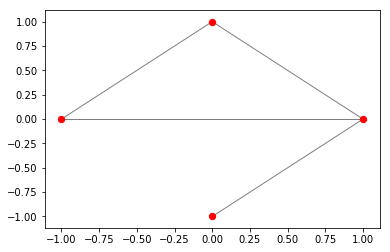

In [98]:

pos = nx.circular_layout(simple_graph)
nx.draw_networkx_nodes(simple_graph, pos,node_size = 40, with_labels=1)

nx.draw_networkx_edges(simple_graph, pos, alpha=0.5);

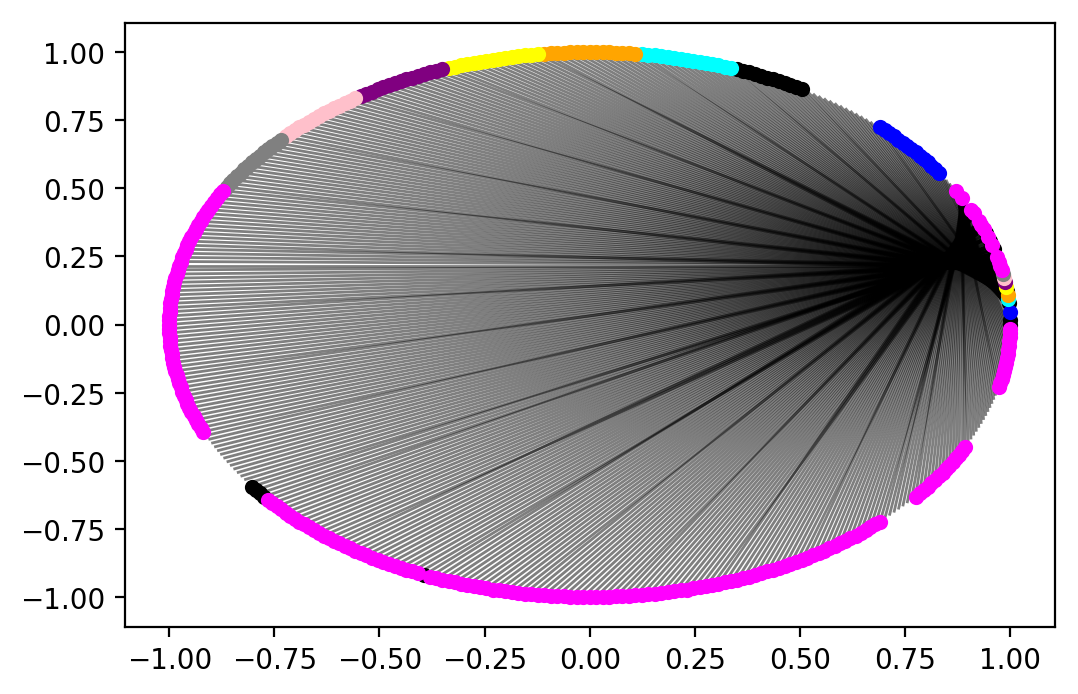

In [115]:
import community 
partition = community.best_partition(undirected_graph)

plt.figure(dpi=200)
#drawing
size = float(len(set(partition.values())))
pos = nx.circular_layout(undirected_graph)
count = 0.

color_map = ['black', 'red', 'blue', 'green', 'cyan', 'orange', 'yellow', 'purple', 'pink', 'gray']
for com in set(partition.values()) :
    count = count + 1.
    if com >= len(color_map):
        the_color = 'magenta'
    else:
        the_color = color_map[com]
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    if len(list_nodes) > 15:
        nx.draw_networkx_nodes(undirected_graph, pos, list_nodes, node_size = 20,
                                    node_color = the_color)
    


nx.draw_networkx_edges(undirected_graph, pos, alpha=0.5);

In [116]:
print(count)

25.0


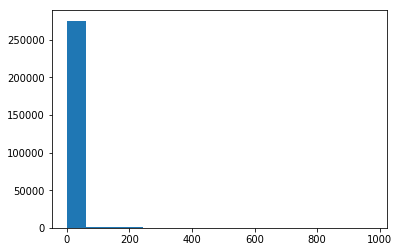

In [47]:
plt.hist([degree for node, degree in undirected_graph.degree], bins=16);


In [55]:
# len(detected_communities) #from my sample network, it was able to detect 2 communities (which makes sense)

In [41]:
# next time i should do it in individual cells so that i can track the bottleneck

part = co.girvan_newman(test_graph)

# detected_communities_2 = deepcopy(tuple(sorted(c) for c in next(part)))
#mod = co.modularity(test_graph, part)

mod = co.modularity(test_graph, detected_communities)

# Plot, color nodes using community structure

In [33]:
print(nx.info(test_graph)) # is this evidence of influencers?

Name: 
Type: DiGraph
Number of nodes: 393
Number of edges: 200
Average in degree:   0.5089
Average out degree:   0.5089


A 0 would mean that there are no connections at all, and a 1 would indicate that all possible edges are present (a perfectly connected network)

In [34]:
density = nx.density(test_graph)
print("Network density:", density)

Network density: 0.0012982292153502623


## Is the sample graph connected?


In [48]:
len(undirected_graph.nodes)

278500

In [49]:
compts = nx.connected_components(undirected_graph)

In [50]:
len(list(compts))

1

### Centrality: finding influencers in my graph

In network analysis, measures of the importance of nodes are referred to as centrality measures. 

Here you’ll learn about three of the most common centrality measures: degree, betweenness centrality, and eigenvector centrality.

#### Degree

In [56]:
G = deepcopy(test_graph)

degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [43]:
undirected = co.girvan_newman(undirected_graph)
undirected_list = list(undirected)

In [46]:
print_level_gn(undirected_list[0], undirected_graph, 3)

Community 3 (size = 5)
--------------------
{86923971, 91772852, 132782517, 1478869, 90149759}

Community 4 (size = 3)
--------------------
{467380104, 339080434, 336949149}

Community 12 (size = 3)
--------------------
{113612857, 6307567, 48113599}

Community 16 (size = 4)
--------------------
{203442592, 105426625, 263626253, 44826824}

Community 30 (size = 3)
--------------------
{12516767, 307710828, 70408319}

Community 45 (size = 3)
--------------------
{219577320, 346763459, 325361564}

Community 81 (size = 3)
--------------------
{375680144, 51028229, 83375974}

Community 99 (size = 3)
--------------------
{15243008, 350731460, 73721040}



In [57]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [58]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
(298314297, 3)
(2870281, 2)
(113612857, 2)
(367200236, 2)
(218301239, 2)
(301264111, 2)
(268008636, 1)
(369847691, 1)
(463888389, 1)
(247063629, 1)
(254170164, 1)
(26508989, 1)
(81923356, 1)
(39836927, 1)
(104159618, 1)
(286617492, 1)
(219577320, 1)
(320586706, 1)
(167403200, 1)
(349261487, 1)


Degree can tell you about the biggest hubs, but it can’t tell you that much about the rest of the nodes.

#### Eigenvalue aka PageRank

Thankfully there are other centrality measures that can tell you about more than just hubs. Eigenvector centrality is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. 

In [118]:
betweenness_dict = nx.betweenness_centrality(undirected_graph) # Run betweenness centrality
#eigenvector_dict = nx.eigenvector_centrality_numpy(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(undirected_graph, betweenness_dict, 'betweenness')
#nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [119]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
(110105365, 0.6890608989790501)
('477797010', 0.6595928545856325)
(5077762, 0.56601607347876)
(460374543, 0.07314543905781266)
(425616225, 0.07314543905781266)
(1048158, 0.07314543905781266)
(3318091, 0.07314543905781266)
(176548370, 0.07314543905781266)
(393388995, 0.07314543905781266)
(154537900, 0.07314543905781266)
(46662330, 0.07314543905781266)
(330461536, 0.07314543905781266)
(26401861, 0.07314543905781266)
(216464917, 0.07314543905781266)
(201118492, 0.07314543905781266)
(157352223, 0.07314543905781266)
(69570434, 0.07314543905781266)
(19223858, 0.07314543905781266)
(97803036, 0.07314543905781266)
(22151970, 0.07314543905781266)


In [122]:
nx.hits(undirected_graph, max_iter= 1000) #this is pagerank for directed graphs

({110105365: 0.0449808153732705,
  '477797010': 0.00922840717551952,
  5077762: 0.018204954088923166,
  460374543: 0.006847045842316388,
  215624405: 0.0063901136172614965,
  101433222: 0.0056376635248326385,
  425616225: 0.006847045842316388,
  1048158: 0.006847045842316388,
  387902204: 0.0043350493233427646,
  3318091: 0.008984787612735256,
  176548370: 0.008984787612735256,
  393388995: 0.008984787612735256,
  154537900: 0.008984787612735256,
  46662330: 0.008984787612735256,
  330461536: 0.008984787612735256,
  26401861: 0.008984787612735256,
  216464917: 0.008984787612735256,
  206592547: 0.008385194870805827,
  60116492: 0.00502907870839471,
  201118492: 0.008984787612735256,
  404296821: 0.0043350493233427646,
  157352223: 0.008984787612735256,
  123313607: 0.004489956510966585,
  69570434: 0.003636386888396871,
  19223858: 0.003636386888396871,
  97803036: 0.003636386888396871,
  195715850: 0.0017545118665771874,
  22151970: 0.003636386888396871,
  3370656: 0.00363638688839687

Now Eigen (pageRank)

In [61]:
sorted_eigen = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_eigen[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
(113612857, 0.2416919942174727)
(163028423, 0.16680802629082572)
(298314297, 0.16165064657426115)
(171368095, 0.15077028805415402)
(359226785, 0.149227355985582)
(336900984, 0.13422491155286279)
(18876542, 0.13286151063743368)
(125826032, 0.13270594675019826)
(187545380, 0.1282250845424116)
(367200236, 0.12745874179768873)
(247063629, 0.12731888952206377)
(518977, 0.12314285177341831)
(7870603, 0.11354250563350178)
(1169134, 0.11130190229093531)
(58733633, 0.11062489475608417)
(109939572, 0.10958975152016455)
(401538000, 0.10269390605093968)
(59145266, 0.10166585342233508)
(65198371, 0.10105527569263906)
(36487432, 0.09536264947495993)


In [62]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: 268008636 | Betweenness Centrality: 0.0 | Degree: 1
Name: 369847691 | Betweenness Centrality: 0.0 | Degree: 1
Name: 463888389 | Betweenness Centrality: 0.0 | Degree: 1
Name: 247063629 | Betweenness Centrality: 0.0 | Degree: 1
Name: 254170164 | Betweenness Centrality: 0.0 | Degree: 1
Name: 26508989 | Betweenness Centrality: 0.0 | Degree: 1
Name: 81923356 | Betweenness Centrality: 0.0 | Degree: 1
Name: 39836927 | Betweenness Centrality: 0.0 | Degree: 1
Name: 104159618 | Betweenness Centrality: 0.0 | Degree: 1
Name: 2870281 | Betweenness Centrality: 0.0 | Degree: 2
Name: 286617492 | Betweenness Centrality: 0.0 | Degree: 1
Name: 219577320 | Betweenness Centrality: 0.0 | Degree: 1
Name: 320586706 | Betweenness Centrality: 0.0 | Degree: 1
Name: 167403200 | Betweenness Centrality: 0.0 | Degree: 1
Name: 349261487 | Betweenness Centrality: 0.0 | Degree: 1
Name: 1169134 | Betweenness Centrality: 0.0 | Degree: 1
Name: 184078961 | Betweenness Centrality: 0.0 | Degree: 1
Name: 401538000 | Bet

In [63]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_eigen[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: 113612857 | Betweenness Centrality: 0.2416919942174727 | Degree: 2
Name: 163028423 | Betweenness Centrality: 0.16680802629082572 | Degree: 1
Name: 298314297 | Betweenness Centrality: 0.16165064657426115 | Degree: 3
Name: 171368095 | Betweenness Centrality: 0.15077028805415402 | Degree: 1
Name: 359226785 | Betweenness Centrality: 0.149227355985582 | Degree: 1
Name: 336900984 | Betweenness Centrality: 0.13422491155286279 | Degree: 1
Name: 18876542 | Betweenness Centrality: 0.13286151063743368 | Degree: 1
Name: 125826032 | Betweenness Centrality: 0.13270594675019826 | Degree: 1
Name: 187545380 | Betweenness Centrality: 0.1282250845424116 | Degree: 1
Name: 367200236 | Betweenness Centrality: 0.12745874179768873 | Degree: 2
Name: 247063629 | Betweenness Centrality: 0.12731888952206377 | Degree: 1
Name: 518977 | Betweenness Centrality: 0.12314285177341831 | Degree: 1
Name: 7870603 | Betweenness Centrality: 0.11354250563350178 | Degree: 1
Name: 1169134 | Betweenness Centrality: 0.111301

You’ll notice that many, but not all, of the nodes that have high degree also have high betweenness centrality. 

### Modularity to detect communities

Modularity is the fraction of the edges that fall within the given groups minus the expected such fraction if edges were distributed at random. The value of the modularity lies in the range [−1/2,1). It is positive if the number of edges within groups exceeds the number expected on the basis of chance. For a given division of the network's vertices into some modules, modularity reflects the concentration of edges within modules compared with random distribution of links between all nodes regardless of modules.

In [33]:
co.modularity(test_graph, detected_communities) # i think based on the defn it tells me there are tight communities

0.9981624999999665

In [72]:
from community import community_louvain

partition = community_louvain.best_partition(G)

TypeError: Bad graph type, use only non directed graph

In [71]:
communities = co.best_partition(G)

AttributeError: module 'networkx.algorithms.community' has no attribute 'best_partition'

In [ ]:
# induced graphs in community draws links between communities

### Help from Star Wars

In [ ]:
from networkx.algorithms import

In [72]:
dir(netwco)

['LFR_benchmark_graph',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'asyn_fluidc',
 'asyn_lpa',
 'asyn_lpa_communities',
 'centrality',
 'community_generators',
 'community_utils',
 'coverage',
 'girvan_newman',
 'is_partition',
 'k_clique_communities',
 'kclique',
 'kernighan_lin',
 'kernighan_lin_bisection',
 'modularity',
 'performance',
 'quality']

In [77]:
nx.__version__

'2.0'

In [12]:
type(test_graph)

networkx.classes.digraph.DiGraph

In [17]:
# so sad this only works for undirected graphs...
for obj in co.label_propagation_communities(undirected_graph):
    if len(obj) > 2:
        print(obj)

{467380104, 339080434, 336949149}
{113612857, 6307567, 48113599}
{86923971, 130437384, 91772852, 1478869, 132782517, 90149759}
{203442592, 105426625, 263626253, 44826824}
{12516767, 307710828, 70408319}
{219577320, 346763459, 325361564}
{375680144, 51028229, 83375974}
{15243008, 350731460, 73721040}


In [23]:
for obj in co.k_clique_communities(undirected_graph, 2):
    print(obj)

frozenset({21199872, 18938611})
frozenset({112131309, 198561799})
frozenset({397624329, 282446894})
frozenset({210046986, 116793834})
frozenset({156788353, 181638156})
frozenset({268287221, 381818894})
frozenset({387400721, 368343155})
frozenset({16882705, 140541980})
frozenset({186732577, 113896469})
frozenset({134260, 128356375})
frozenset({451608, 44438160})
frozenset({32791577, 3990522})
frozenset({412879782, 107619358})
frozenset({66837656, 18071585})
frozenset({83534881, 63958473})
frozenset({3992613, 406445})
frozenset({246426669, 135042366})
frozenset({10931907, 1463343})
frozenset({215582768, 60758707})
frozenset({2768949, 40212679})
frozenset({113612857, 6307567, 48113599})
frozenset({68812858, 71997590})
frozenset({104085562, 3336892})
frozenset({82936295, 65927239})
frozenset({45988850, 23749706})
frozenset({117962827, 742980})
frozenset({225733708, 200374693})
frozenset({123159634, 11468574})
frozenset({123862824, 63821908})
frozenset({220777556, 93034942})
frozenset({1872

In [81]:
def community_printer(community_iterator, G):
    total_size = 0
    for index, this_community in enumerate(community_iterator):
        print('Community {}, size {}'.format(index, len(this_community)))
        print('-'*20)
        for character in this_community:
            print(G.nodes[character]['name'])
        print('\n')
        total_size += len(this_community)
    print('Number of characters = ', total_size)

In [84]:
# community_printer(communities, G)

detected_communities = deepcopy(tuple(sorted(c) for c in next(community_generator)))

community 0 has 9 people inside
--------------------
[163018937, 246653438, 266974231, 312868680, 313384463, 314087584, 314161245, 314175898, 336293979] 



In [86]:
for index, i in enumerate(detected_communities):
    print(f'community {index} has {len(i)} people inside')
    print('-'*20)
    print(i, '\n')
    #break

community 0 has 9 people inside
--------------------
[163018937, 246653438, 266974231, 312868680, 313384463, 314087584, 314161245, 314175898, 336293979] 

community 1 has 4 people inside
--------------------
[192259204, 270728499, 311461676, 335340311] 

community 2 has 2 people inside
--------------------
[33546656, 116395755] 

community 3 has 3 people inside
--------------------
[201210633, 236113411, 299338398] 

community 4 has 3 people inside
--------------------
[3862359, 4647309, 15000073] 

community 5 has 3 people inside
--------------------
[3184, 9103156, 9531993] 

community 6 has 2 people inside
--------------------
[338893594, 425829603] 

community 7 has 4 people inside
--------------------
[11978, 5805424, 65533795, 276458698] 

community 8 has 17 people inside
--------------------
[56627, 353079, 413622, 516750, 1282507, 2541926, 9326075, 11068483, 13092526, 13290874, 14059264, 28867041, 34492851, 66131578, 72718792, 142500372, 172822224] 

community 9 has 7 people in

--------------------
[13485154, 14073843, 39537804] 

community 136 has 2 people inside
--------------------
[140134314, 459250698] 

community 137 has 2 people inside
--------------------
[43199524, 379385933] 

community 138 has 2 people inside
--------------------
[5586928, 87622114] 

community 139 has 2 people inside
--------------------
[68271673, 68765227] 

community 140 has 3 people inside
--------------------
[47420097, 93249039, 202046481] 

community 141 has 3 people inside
--------------------
[266529, 44547356, 125707237] 

community 142 has 2 people inside
--------------------
[179136592, 214725364] 

community 143 has 2 people inside
--------------------
[148501618, 166989472] 

community 144 has 2 people inside
--------------------
[6440647, 57750552] 

community 145 has 2 people inside
--------------------
[112665767, 135016818] 

community 146 has 3 people inside
--------------------
[50542016, 96475197, 96793935] 

community 147 has 2 people inside
-----------------

community 486 has 2 people inside
--------------------
[249307466, 293786139] 

community 487 has 2 people inside
--------------------
[648360, 3252075] 

community 488 has 2 people inside
--------------------
[30439068, 336900984] 

community 489 has 2 people inside
--------------------
[658424, 100600655] 

community 490 has 2 people inside
--------------------
[67411005, 280986294] 

community 491 has 2 people inside
--------------------
[7667123, 11907639] 

community 492 has 2 people inside
--------------------
[99063651, 107784516] 

community 493 has 2 people inside
--------------------
[133719508, 151269641] 

community 494 has 4 people inside
--------------------
[24779951, 89152418, 133597557, 193518863] 

community 495 has 2 people inside
--------------------
[15943721, 288467179] 

community 496 has 2 people inside
--------------------
[288477420, 348842375] 

community 497 has 2 people inside
--------------------
[241061662, 477788172] 

community 498 has 2 people inside
-

community 770 has 2 people inside
--------------------
[8955348, 10686907] 

community 771 has 2 people inside
--------------------
[10011948, 162389481] 

community 772 has 2 people inside
--------------------
[163040549, 234490920] 

community 773 has 2 people inside
--------------------
[44477432, 92112731] 

community 774 has 2 people inside
--------------------
[97250337, 256760395] 

community 775 has 2 people inside
--------------------
[46865432, 56681565] 

community 776 has 2 people inside
--------------------
[2275488, 126580999] 

community 777 has 2 people inside
--------------------
[241466, 87274862] 

community 778 has 2 people inside
--------------------
[119948244, 138473252] 

community 779 has 2 people inside
--------------------
[242557765, 256742501] 

community 780 has 2 people inside
--------------------
[46495326, 159465843] 

community 781 has 2 people inside
--------------------
[341940121, 393122388] 

community 782 has 2 people inside
--------------------
[

[45341110, 98486031] 

community 1186 has 2 people inside
--------------------
[9911053, 94048828] 

community 1187 has 2 people inside
--------------------
[295368464, 460255845] 

community 1188 has 2 people inside
--------------------
[9684993, 24860349] 

community 1189 has 2 people inside
--------------------
[418772997, 459919311] 

community 1190 has 2 people inside
--------------------
[300234587, 461314815] 

community 1191 has 2 people inside
--------------------
[30064007, 240162494] 

community 1192 has 2 people inside
--------------------
[15319885, 95901935] 

community 1193 has 2 people inside
--------------------
[6483249, 7157671] 

community 1194 has 2 people inside
--------------------
[182433692, 203042114] 

community 1195 has 2 people inside
--------------------
[283764215, 296000584] 

community 1196 has 2 people inside
--------------------
[10325818, 149217196] 

community 1197 has 2 people inside
--------------------
[714277, 32153913] 

community 1198 has 2 pe

In [88]:
len(G.nodes), len(G.edges)

3509